In [1]:

conda install -c conda-forge netcdf4


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr

%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [17]:
# Change the filename to where your data are stored

filename = '/Users/gabrielm/Desktop/DATA-LASP/brw_dmin.nc'

dataset = nc.Dataset(filename)

In [18]:
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Source_of_Data: United States Geological Survey (USGS)
    Station_Name: Barrow
    IAGA_CODE: BRW
    Latitude: 71.3225
    Longitude: -156.6231
    Elevation: 10
    Sensor_Orientation: HDZF
    Digital_Sampling: 100.0 second
    Data_Interval_Type: filtered 1-minute (00:15-01:45)
    Data_Type: Definitive
    url: https://geomag.usgs.gov/monitoring/observatories/barrow
    file_conversion_author: Greg Lucas (glucas@usgs.gov)
    dimensions(sizes): Time(21906522)
    variables(dimensions): int64 Time(Time), float64 X(Time), float64 Y(Time), float64 Z(Time)
    groups: 


In [19]:
print(dataset.__dict__)

{'Source_of_Data': 'United States Geological Survey (USGS)', 'Station_Name': 'Barrow', 'IAGA_CODE': 'BRW', 'Latitude': 71.3225, 'Longitude': -156.6231, 'Elevation': 10, 'Sensor_Orientation': 'HDZF', 'Digital_Sampling': '100.0 second', 'Data_Interval_Type': 'filtered 1-minute (00:15-01:45)', 'Data_Type': 'Definitive', 'url': 'https://geomag.usgs.gov/monitoring/observatories/barrow', 'file_conversion_author': 'Greg Lucas (glucas@usgs.gov)'}


In [20]:
for dim in dataset.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 21906522


In [21]:
for var in dataset.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int64 Time(Time)
    units: minutes since 1975-05-09 03:18:00
    calendar: proleptic_gregorian
unlimited dimensions: Time
current shape = (21906522,)
filling on, default _FillValue of -9223372036854775806 used
<class 'netCDF4._netCDF4.Variable'>
float64 X(Time)
    _FillValue: nan
    description: X-component (Geographic North) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (21906522,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Y(Time)
    _FillValue: nan
    description: Y-component (Geographic East) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (21906522,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Z(Time)
    _FillValue: nan
    description: Z-component (Geographic Down [-r]) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (21906522,)
filling on


In [22]:
# Dataframe Creation

ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)

In [54]:
df.head(10)

,Time,X,Y,Z,Time_Diff
0,1975-05-09 03:18:00,8858.333970,4330.071510,56383.0,NaT
1,1975-05-09 03:19:00,8848.265704,4334.720641,56383.0,0 days 00:01:00
2,1975-05-09 03:20:00,8843.581935,4341.999835,56384.0,0 days 00:01:00
3,1975-05-09 03:21:00,8868.040936,4328.426268,56390.0,0 days 00:01:00
4,1975-05-09 03:22:00,8863.187317,4329.250118,56387.0,0 days 00:01:00
5,1975-05-09 03:23:00,8864.085856,4329.689012,56384.0,0 days 00:01:00
6,1975-05-09 03:24:00,8867.318081,4334.463063,56398.0,0 days 00:01:00
7,1975-05-09 03:25:00,8871.274167,4333.200163,56396.0,0 days 00:01:00
8,1975-05-09 03:26:00,8871.274167,4333.200163,56393.0,0 days 00:01:00
9,1975-05-09 03:27:00,8858.677105,4343.016918,56403.0,0 days 00:01:00


In [49]:
df.tail(10)

,Time,X,Y,Z,Time_Diff
21906512,2016-12-31 23:50:00,8816.1,2257.0,56688.3,0 days 00:01:00
21906513,2016-12-31 23:51:00,8813.0,2262.2,56688.4,0 days 00:01:00
21906514,2016-12-31 23:52:00,8828.7,2264.7,56689.5,0 days 00:01:00
21906515,2016-12-31 23:53:00,8814.7,2253.2,56689.0,0 days 00:01:00
21906516,2016-12-31 23:54:00,8803.3,2243.0,56688.5,0 days 00:01:00
21906517,2016-12-31 23:55:00,8807.9,2242.2,56690.3,0 days 00:01:00
21906518,2016-12-31 23:56:00,8803.1,2257.3,56692.6,0 days 00:01:00
21906519,2016-12-31 23:57:00,8798.4,2264.6,56694.3,0 days 00:01:00
21906520,2016-12-31 23:58:00,8792.1,2262.5,56693.1,0 days 00:01:00
21906521,2016-12-31 23:59:00,8785.8,2250.3,56692.3,0 days 00:01:00


In [24]:
df.shape[0]

21906522

(array([    0.,  1826.,  3652.,  5479.,  7305.,  9131., 10957., 12784.,
        14610., 16436., 18262.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

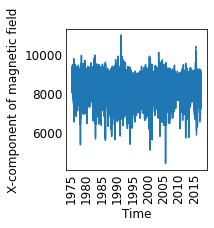

In [60]:
# Plot the time series for the x component
plt.plot(df['Time'], df['X'])
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')
plt.xticks(rotation=90)



In [47]:
# Exploring Data dropouts

# Difference in time between rows

df['Time_Diff'] = df['Time'].diff()

In [55]:
df['Time_Diff'].max() # check the max time diff

Timedelta('0 days 00:01:00')

In [29]:
# Print the number of nans in each column
for col in df.columns.to_list():
    print(col, df[col].isna().sum())

Time 0
X 638226
Y 638226
Z 642453
Time_Diff 1


In [30]:
df_1975 = df[df['Time'] < pd.Timestamp(1975, 5, 31)]
inds_1975 = list(pd.isnull(df_1975['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_1975 = len(inds_1975) # number of NaNs in the X component

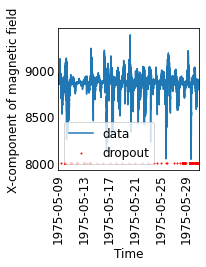

In [59]:
# Plot the 1975 data
plt.plot(df_1975['Time'], df_1975['X'], label='data')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

# This just puts a green dot anywhere there is a data dropout. 
# The y-value 8000 is just so it displays at the bottom.
plt.scatter(df_1975['Time'][inds_1975], [8000]*inds_len_1975, color='red', label='dropout', s=1)
plt.xlim([datetime.date(1975, 5, 9), datetime.date(1975, 5, 31)])
plt.xticks(rotation=90)
plt.legend()